In [1]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

import string
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/is_up.csv")
df = df['stock' == ]

In [3]:
df.head()

,Unnamed: 0,title,date,stock,is_up
0,0,Stocks That Hit 52-Week Highs On Friday,2020-06-05,A,0
1,1,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03,A,1
2,2,71 Biggest Movers From Friday,2020-05-26,A,1
3,3,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22,A,1
4,4,B of A Securities Maintains Neutral on Agilent...,2020-05-22,A,1


In [4]:
df.shape

(337226, 5)

In [5]:
(df["is_up"] == "Na").sum()

4832

In [6]:
df = df[df["is_up"].str.contains("Na")==False]

In [7]:
df.shape

(332394, 5)

In [8]:
df.isnull().sum()

Unnamed: 0    0
title         0
date          0
stock         0
is_up         0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.drop_duplicates()
df.shape

(332394, 5)

In [11]:
df.is_up.value_counts()

1    175864
0    154674
2      1856
Name: is_up, dtype: int64

In [12]:
def make_lower(a_string):
    return a_string.lower()

def remove_punctuation(a_string):    
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string

In [13]:
# Break words into their stem words

def stem_words(a_string):
    # Initalize our Stemmer
    porter = PorterStemmer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in words:
        # Stem the word
        stemmed_word = porter.stem(word)
        
        # Append stemmed word to our valid_words
        valid_words.append(stemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string 


In [14]:
# Remove all stopwords

def remove_stopwords(a_string):
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string

In [15]:
def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punctuation(input_string)
    input_string = stem_words(input_string)
    return input_string

In [16]:
df["title_clean"] = df["title"].apply(text_pipeline)

In [17]:
df.head()

,Unnamed: 0,title,date,stock,is_up,title_clean
0,0,Stocks That Hit 52-Week Highs On Friday,2020-06-05,A,0,stock that hit 52week high on friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03,A,1,stock that hit 52week high on wednesday
2,2,71 Biggest Movers From Friday,2020-05-26,A,1,71 biggest mover from friday
3,3,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22,A,1,46 stock move in friday midday session
4,4,B of A Securities Maintains Neutral on Agilent...,2020-05-22,A,1,b of a secur maintain neutral on agil technolo...


In [55]:
# Define our `X` and `y` data. 
X = df['title']

y = df['is_up']

In [56]:
# Initialize our vectorizer
vectorizer = TfidfVectorizer()

# This makes your vocab matrix
vectorizer.fit(X)

# This transforms your documents into vectors.
X = vectorizer.transform(X)

print(X.shape, type(X))

(332394, 52348) <class 'scipy.sparse.csr.csr_matrix'>


In [61]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [62]:
# Initalize our model.
model = MultinomialNB(alpha=.05)


# Fit our model with our training data.
model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = model.predict_proba(X_test)

# Evaluate our model
accuracy =  model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.588833


In [109]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

           0       0.56      0.48      0.52     30662
           1       0.59      0.65      0.62     34797
           2       0.01      0.05      0.02       384

    accuracy                           0.57     65843
   macro avg       0.39      0.39      0.39     65843
weighted avg       0.57      0.57      0.57     65843



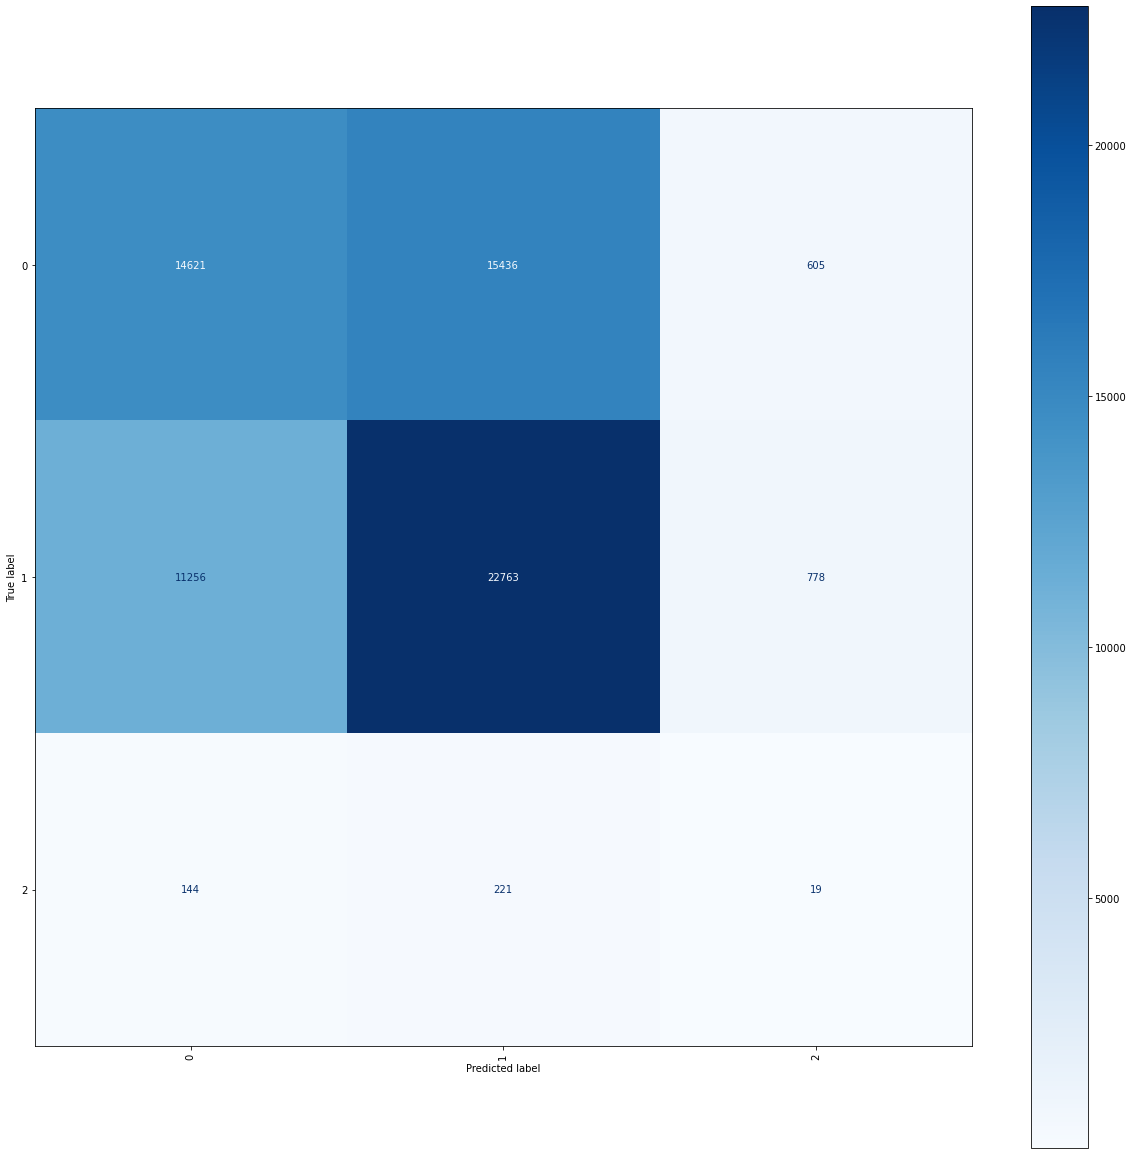

In [110]:
# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [ ]:
rf_model = RandomForestClassifier()


# Fit our model with our training data.
rf_model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = rf_model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = rf_model.predict_proba(X_test)

# Evaluate our model
accuracy =  rf_model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

print(classification_report(y_test, y_pred, target_names=rf_model.classes_))